In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

In [2]:
results = {
    'platform' : [],
    'average' : [],
    'p50' : [],
    'p90' : []
}

In [3]:
with open('inference-analysis/llama2-7b/modal-llama-results.json', 'r') as f:
    modal_dict = json.load(f)

In [5]:
modal_dict.keys()

dict_keys(['p1', 'p2', 'p3', 'p4', 'p5'])

In [31]:
with open('inference-analysis/llama2-7b/modal-llama-results.json', 'r') as f:
    modal_dict = json.load(f)
    
with open('inference-analysis/llama2-7b/baseten-llama-results.json', 'r') as f:
    baseten_dict = json.load(f)
      
with open('inference-analysis/llama2-7b/hf-llama-results.json', 'r') as f:
    hf_dict = json.load(f)
    
with open('inference-analysis/llama2-7b/runpod-llama-results.json', 'r') as f:
    runpod_dict = json.load(f) 
    
with open('inference-analysis/llama2-7b/replicate-llama-results.json', 'r') as f:
    replicate_dict = json.load(f) 

In [32]:
def create_one(plat):
    array = []
    for key, value in plat.items():
        array += value
    return array

In [33]:
all_plats = {}
for name, plat_dict in [('modal', modal_dict), ('baseten', baseten_dict), ('hf', hf_dict), ('runpod', runpod_dict)]:
    all_plats[name] = create_one(plat_dict)
all_plats['replicate'] = replicate_dict['replicate']

In [34]:
all_plats.keys()

dict_keys(['modal', 'baseten', 'hf', 'runpod', 'replicate'])

In [35]:
#GET AVERAGE, MEDIAN AND P90 FOR EACH PLATFORM

results = {
    'platform' : [],
    'average' : [],
    'p50' : [],
    'p90' : []
}

for plat, values in all_plats.items():
    results['platform'].append(plat)
    results['average'].append(np.mean(values))
    results['p50'].append(np.percentile(values, 50))
    results['p90'].append(np.percentile(values, 90))

In [36]:
df = pd.DataFrame(results)
df

,platform,average,p50,p90
0,modal,9.456537,8.475154,14.869233
1,baseten,8.852935,7.584930,13.380008
2,hf,8.997245,8.060723,16.502749
3,runpod,11.049534,9.494102,16.014234
4,replicate,6.947230,5.950246,10.410835


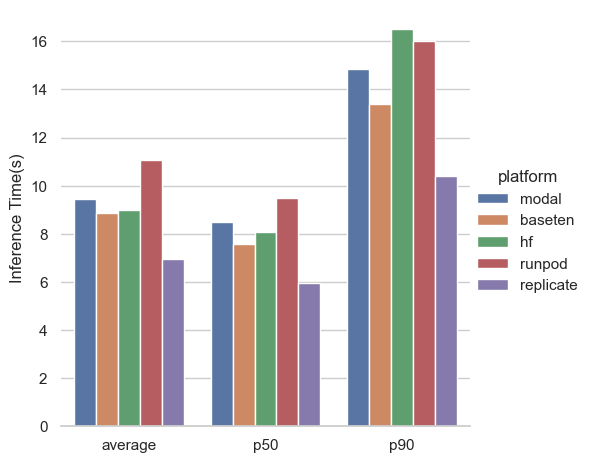

In [37]:
tdf = pd.melt(df, id_vars="platform", var_name="metric", value_name='value')
tdf

sns.set_theme(style="whitegrid")
ax = sns.catplot(
    data=tdf,
    kind="bar",
    x="metric",
    y="value",
    hue="platform"
)
ax.despine(left=True)
ax.set_axis_labels("", "Inference Time(s)")
plt.show()

### Average Inference Time

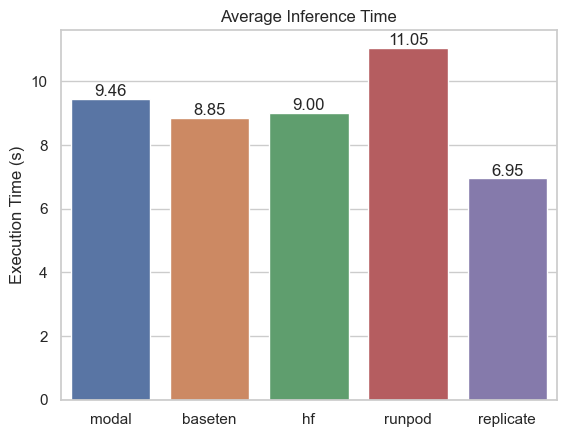

In [38]:
ax = sns.barplot(
    data=df,
    x="platform",
    y="average"
)

for i in ax.containers:
    ax.bar_label(i,fmt='%.2f')


plt.ylabel('Execution Time (s)')
plt.xlabel('')
plt.title('Average Inference Time')

plt.show()